Data Analytics in Python

Assignment

By Ammaar Ahmad Khan

Tourism Dataset

In [4]:
# Importing our required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Data Collection
1. Loading our dataset
2. Displaying the first few rows

In [6]:
#Loading our dataset
data_set=pd.read_csv("C:\\Users\\ammaa\\Data Analytics in Python\\Assignment\\Dataset.csv")
print("Tourism Dataset:")
print(data_set)
print()

Tourism Dataset:
    Year    Country  Number_of_Tourists  Revenue  Average_Spending
0   2015  Country A              500000      350               700
1   2016  Country A              550000      385               700
2   2017  Country A              600000      420               700
3   2018  Country A              650000      455               700
4   2019  Country A              700000      490               700
5   2020  Country A              300000      210               700
6   2015  Country B              400000      280               700
7   2016  Country B              450000      315               700
8   2017  Country B              480000      336               700
9   2018  Country B              500000      350               700
10  2019  Country B              520000      364               700
11  2020  Country B              200000      140               700
12  2015  Country C              350000      245               700
13  2016  Country C              370000      

In [7]:
# Displaying the first few rows of the dataset
# Here is a program that takes asks the user how many first few rows to be extracted, and then extracts that many rows using head()
r = int(input("Enter the number of first few rows to be displayed:"))
print()
print("Here are the first",r,"rows of the dataset.")
print(data_set.head(r))

Enter the number of first few rows to be displayed: 7



Here are the first 7 rows of the dataset.
   Year    Country  Number_of_Tourists  Revenue  Average_Spending
0  2015  Country A              500000      350               700
1  2016  Country A              550000      385               700
2  2017  Country A              600000      420               700
3  2018  Country A              650000      455               700
4  2019  Country A              700000      490               700
5  2020  Country A              300000      210               700
6  2015  Country B              400000      280               700


Data Cleaning
1. Checking for missing values
2. Fill missing values or drop them, depending on the analysis needs
3. Check for duplicate rows and remove them

In [20]:
# Checking for missing values
print("Number of missing values in each column:")
print(data_set.isnull().sum())

Number of missing values in each column:
Year                  0
Country               0
Number_of_Tourists    0
Revenue               0
Average_Spending      0
dtype: int64


In [24]:
# Fill missing values (use fillna() function) or drop them (use dropna() ), depending on the analysis needs.
# Check for duplicate rows and remove them (use drop_duplicates() function)

#As we do not have any missing values or duplicate rows in our dataset, we do not need these functions in our case.

Data Analysis
1. Descriptive statistics.2.  Analyze trends, e.g., number of tourists over tim
3. Analyze relationships, e.g., tourists vs. revenue
4. Analyze the average spending per tourist over the years for each country.
5. Analyzing the total revenue generated by each country over the given period.
6. Analyzing the yearly change in the number of tourists for each country. try.

In [28]:
#Descriptive statistics.
print("General Statistics:")
print(data_set.describe())

General Statistics:
              Year  Number_of_Tourists     Revenue  Average_Spending
count    48.000000           48.000000   48.000000              48.0
mean   2017.500000       489166.666667  342.416667             700.0
std       1.725898       128524.082243   89.966858               0.0
min    2015.000000       200000.000000  140.000000             700.0
25%    2016.000000       407500.000000  285.250000             700.0
50%    2017.500000       505000.000000  353.500000             700.0
75%    2019.000000       592500.000000  414.750000             700.0
max    2020.000000       700000.000000  490.000000             700.0


In [30]:
#Analyze trends, e.g., number of tourists over time

#Step 1: Dictionary to store year and number of tourists
tourists_by_year = {}
#Step 2: Iterate through each row in the dataset
for index, row in data_set.iterrows():
    year = row['Year']
    tourists = row['Number_of_Tourists']
    
    #Step 3: Add tourists to the corresponding year in the dictionary (2015-2020)
    if year in tourists_by_year:
        tourists_by_year[year] += tourists
    else:
        tourists_by_year[year] = tourists

#Step 4: Convert the dictionary to a Pandas Series
year_vs_tourists = pd.Series(tourists_by_year)

#Step 5: Print the Series
print("Year    Tourists")
print(year_vs_tourists)

Year    Tourists
2015    3850000
2016    4070000
2017    4270000
2018    4460000
2019    4650000
2020    2180000
dtype: int64


In [32]:
# Analyze relationships, e.g., tourists vs. revenue
# We will perform correlation analysis to analyze this relationship
#using corr() function
correlation = data_set['Number_of_Tourists'].corr(data_set['Revenue'])
print(f"Correlation coefficient (using corr() function): {correlation:.2f}")

Correlation coefficient (using corr() function): 1.00


This indicates that the revenue generated is directly proportional to the number of tourists. As the number of tourists increases, revenue follows the same pattern.

In [35]:
#Analyze the average spending per tourist over the years for each country.
# Initialize dictionaries to store total spending and total tourists for each country
total_spending = {}
total_tourists = {}

# Iterate through each row in the dataset
for index, row in data_set.iterrows():
    country = row['Country']
    tourists = row['Number_of_Tourists']
    spending = row['Average_Spending']
    
    # Update total spending and total tourists for the country
    total_spending[country] = total_spending.get(country, 0) + spending
    total_tourists[country] = total_tourists.get(country, 0) + tourists

# Calculate average spending per tourist for each country
average_spending_per_tourist = {}
for country in total_spending:
    average_spending_per_tourist[country] = total_spending[country] / total_tourists[country]

# Create a DataFrame ASTC (Average Spending per Tourist by Country) from the dictionaries
ASTC = pd.DataFrame({
    'Country': list(average_spending_per_tourist.keys()),
    'Average Spending': list(average_spending_per_tourist.values())
})

# Print the result
print(ASTC)

     Country  Average Spending
0  Country A          0.001273
1  Country B          0.001647
2  Country C          0.001935
3  Country D          0.001550
4  Country E          0.001292
5  Country F          0.001186
6  Country G          0.001550
7  Country H          0.001292


In [37]:
#Analyzing the total revenue generated by each country over the given period

#Step 1: Dictionary to store country and revenue
country_revenue = {}
#Step 2: Iterate through each row in the dataset
for index, row in data_set.iterrows():
    country = row['Country']
    revenue = row['Revenue']
    
    #Step 3: Add tourists to the corresponding year in the dictionary (2015-2020)
    if country in country_revenue:
        country_revenue[country] += revenue
    else:
        country_revenue[country] = revenue

#Step 4: Convert the dictionary to a Pandas Series
country_vs_revenue = pd.Series(country_revenue)

#Step 5: Print the Series
print("Country    Revenue")
print(country_vs_revenue)

Country    Revenue
Country A    2310
Country B    1785
Country C    1519
Country D    1897
Country E    2275
Country F    2478
Country G    1897
Country H    2275
dtype: int64


In [39]:
# Analyzing the yearly change in the number of tourists for each country.

grouped_df = data_set.groupby(['Country', 'Year'])['Number_of_Tourists'].sum()

# Convert the grouped data back to a DataFrame
new_df = grouped_df.reset_index()

# Pivot the DataFrame
pivot_df = new_df.pivot(index='Country', columns='Year', values='Number_of_Tourists')

pivot_df.columns.name = None
pivot_df.index.name = None

# Print the new DataFrame (without 'Year' and 'Country' labels)
print(pivot_df)

             2015    2016    2017    2018    2019    2020
Country A  500000  550000  600000  650000  700000  300000
Country B  400000  450000  480000  500000  520000  200000
Country C  350000  370000  390000  410000  430000  220000
Country D  450000  470000  490000  510000  530000  260000
Country E  550000  570000  590000  610000  630000  300000
Country F  600000  620000  640000  660000  680000  340000
Country G  450000  470000  490000  510000  530000  260000
Country H  550000  570000  590000  610000  630000  300000


Data Visualization
1. Plot the number of tourists over time
2. Plot revenue distribution

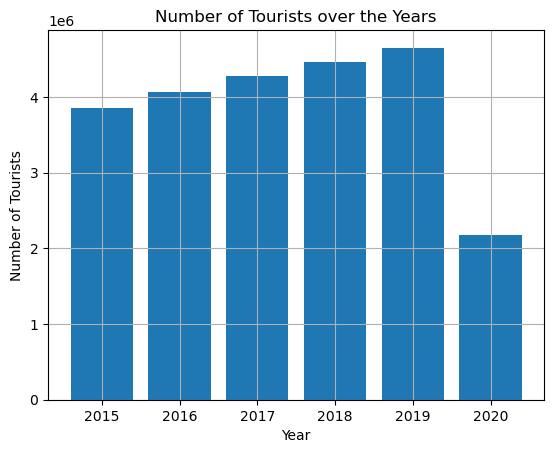

In [42]:
#Plot the number of tourists over time
plt.bar(year_vs_tourists.index,year_vs_tourists.values)
plt.xlabel('Year')
plt.ylabel('Number of Tourists')
plt.title('Number of Tourists over the Years')
plt.grid(True)
plt.show()

C:\Users\ammaa\Apps\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


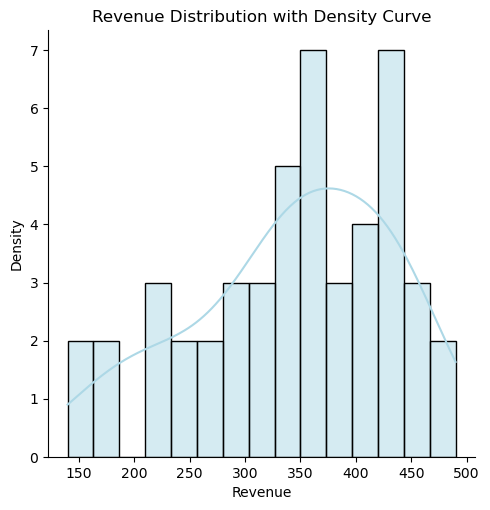

In [44]:
# Plot revenue distribution
sns.displot(data_set['Revenue'], kde=True, bins=15, color='lightblue')
plt.title('Revenue Distribution with Density Curve')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.show()

Conclusions

1. Trends in Tourists Over Time:
The number of tourists has generally increased from 2015 to 2020.
However, there’s a significant drop in 2020, which could be due to external factors (e.g., the pandemic).
2. Tourists vs. Revenue:
The correlation coefficient of 1.00 indicates a perfect positive linear relationship between the number of tourists and revenue.
As the number of tourists increases, revenue follows the same pattern.
3. Average Spending per Tourist:
Country C has the highest average spending per tourist, followed by Country B.
Country F has the lowest average spending per tourist.
These insights can help tailor marketing strategies for each country.
4. Total Revenue by Country:
Country F generates the highest revenue, followed by Country E.
Country C has the lowest revenue.
5. Yearly Change in Tourists:
Most countries show steady growth in tourists over the years.
Country F and Country A have the highest yearly increases.
Country B and Country G have the lowest yearly increases.